# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [4]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [5]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [6]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,226
Treatment,172


col_0,Frequency
status,
Control,0.567839
Treatment,0.432161


<font size = "5">

Query with string conditions

In [7]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [8]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,172.000000,172.000000,172.000000,172.000000,172.000000
mean,23.809884,5.511628,195.674419,2962.168605,15.420349
std,8.095842,1.656066,102.431257,846.602160,2.693330
min,9.000000,4.000000,72.000000,1613.000000,8.000000
25%,17.000000,4.000000,105.000000,2213.750000,13.775000
50%,22.700000,5.500000,156.000000,2877.500000,15.500000
75%,30.000000,6.500000,260.000000,3522.500000,17.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,226.000000,226.000000,226.000000,226.000000,226.000000
mean,23.289823,5.411504,191.716814,2976.707965,15.680531
std,7.606537,1.736830,105.840086,848.849168,2.806401
min,10.000000,3.000000,68.000000,1649.000000,8.500000
25%,17.525000,4.000000,98.500000,2247.250000,13.925000
50%,23.000000,4.000000,140.000000,2747.500000,15.450000
75%,28.325000,8.000000,293.250000,3649.500000,17.500000
max,44.000000,8.000000,455.000000,4955.000000,24.600000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [96]:

def good_car(cylinders):
    if cylinders < 4:
        status = "bad car"
    elif cylinders >= 4 and cylinders < 6:
        status = "normal car"
    else:
        status = "good car"
        return status 


y = carfeatures["cylinders"].apply(good_car)
y

data = pd.DataFrame([])
data["age"] = [18,29,15,32,6]
def fn_agebracket(age):
    if (age >= 18):
        status = "Adult"
    elif (age >= 10) & (age < 18):
        status = "Adolescent"
    else:
        status = "Child"
    return(status)
data["age_bracket"] = data["age"].apply(fn_agebracket)

data["age_bracket"]





0         Adult
1         Adult
2    Adolescent
3         Adult
4         Child
Name: age_bracket, dtype: object

<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [109]:

carfeatures = pd.read_csv("data_raw/features.csv")

x = carfeatures["cylinders"].mean()
y = carfeatures["cylinders"].median()


yes = carfeatures.query("(cylinders >= @x) and (cylinders >= @y)")

yes.iloc[0:,:]

display(yes.iloc[0:,:])

carfeatures["new variable"] = carfeatures["cylinders"] # create a new variable

# subset_data = dataset.query("abs(y-@ybar <= @stdv_sample")






,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
365,20.2,6,200,88,3060,17.1,F-1693795
366,17.6,6,225,85,3465,16.6,C-1693806
386,25.0,6,181,110,2945,16.4,B-1694026
387,38.0,6,262,85,3015,17.0,O-1694037


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [62]:



carsorted = carfeatures.sort_values(by = "mpg", ascending = False)
carsorted.iloc[0:1,:]




,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
322,46.6,4,86,65,2110,17.9,M-1693322,Control


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [86]:


list_status  = ["Treatment","Control"]
prop_status  = [0.5,0.5]
size_dataset = len(carfeatures)


carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')


,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Control
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Treatment
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [104]:



def f(x, y, b0, b1):
    V = (np.sin(b0)) + (np.exp(b1)) * x + y
    return V


b0 = 3
b1 = 2

dataset = pd.DataFrame([])
dataset["x"] = data_treated.median()
dataset["y"] = data_control.min()

for x, y in zip(dataset["x"], dataset["y"]):
    result = f(x, y, b0, b1)
    print(result)






186.37010796755587
33.697344403782466
1113.608973858351
22004.209550583386
121.93258393159189


/var/folders/70/wslpk4jx0_xf7yjd_3v7bpk40000gn/T/ipykernel_11909/4213604374.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset["x"] = data_treated.median()


<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

<function matplotlib.pyplot.show(close=None, block=None)>

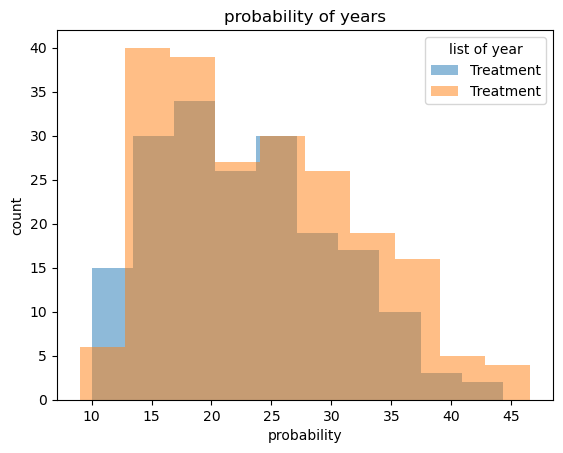

In [87]:

list_df = [data_control, data_treated]

for cylinder in list_df:
    plt.hist(cylinder["mpg"],alpha = 0.5)
    plt.legend(labels = cylinder["status"], title = "list of year")

plt.xlabel("probability")
plt.ylabel("count")
plt.title("probability of years")
plt.show